In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer 
from scipy import stats
from sklearn.utils import shuffle 
from sklearn.inspection import permutation_importance

The following code aims to demonstrate the use of the Naive Bayes Classifier on the original features in the dataset from the csv file named 'df-filteredfinalN.csv'.

In [2]:
df= pd.read_csv('df-filteredfinalN.csv')
                
x=df[['Day','State ID','Lat','Long_','Incident_Rate','Active','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']].values

y=df['Confirmed'].values

y1=df['Deaths'].values

y2=df['Recovered'].values



# Hyper-Parameter Tuning- Label 1('Confirmed'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Text(0, 0.5, 'Accuracy')

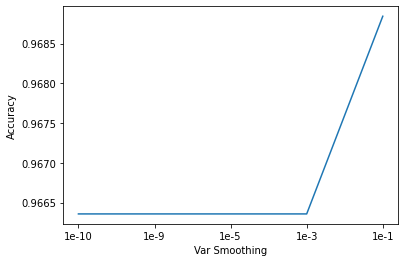

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

params_NB= {'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}
gs_NB= GridSearchCV(estimator= GaussianNB(), param_grid=params_NB, cv=10, verbose=1, scoring='accuracy')

TransformedData= PowerTransformer().fit_transform(x_train)

gs_NB.fit(TransformedData, y_train)

df_score= pd.DataFrame.from_dict(gs_NB.cv_results_)

var_smoothing= ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']

plt.plot(var_smoothing, df_score.mean_test_score)

plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")

Figure 1 Accuracy based on number of estimators for Hyper-Parameter Tuning- Label 1 in original dataset 

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Naive Bayes Classifer with the smoothing parameter being: {1e-10, 1e-9, 1e-5, 1e-3, 1e-1}. The Naive Bayes Classifer is intialized as 'gs_NB'and the K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier(1). A power transform using the command 'PowerTransformer().fit_transform()' is applied on the training sample to make the data more Gaussian(2). The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library. From Figure 1, it is clear that by increasing smoothing parameter; the Accuracy improved slightly.  

The same algortithm is repeated for each label to find the best Naive Bayes Classifier Parameters for those labels.

# Best Parameter Evaluation:

In [4]:
gs_NB.best_params_

{'var_smoothing': 0.1}

In [5]:
gs_NB.best_score_

0.9688425925925925

In [6]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=0.1)

Therfore, the best value for smoothing parameter is 1e-1 for the label 1.

# Best Parameter Testing on Test Set:

In [7]:
classifier= GaussianNB(var_smoothing= 0.1)
classifier.fit(x_train, y_train)

predY= classifier.predict(x_test)

print('Accuracy on Test Set:', accuracy_score(y_test,predY))

Accuracy on Test Set: 0.9601990049751243


The test accuracy reached 96.01%.

# Hyper-Parameter Tuning- Label 2('Deaths'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Text(0, 0.5, 'Accuracy')

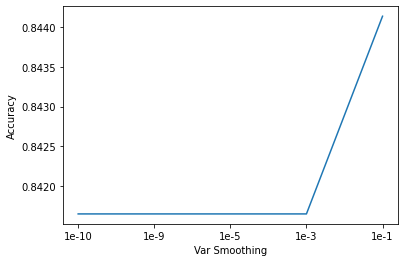

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size = 0.2, random_state = 0)

params_NB= {'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}
gs_NB= GridSearchCV(estimator= GaussianNB(), param_grid=params_NB, cv=10, verbose=1, scoring='accuracy')

TransformedData= PowerTransformer().fit_transform(x_train)

gs_NB.fit(TransformedData, y_train)

df_score= pd.DataFrame.from_dict(gs_NB.cv_results_)

var_smoothing= ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']

plt.plot(var_smoothing, df_score.mean_test_score)

plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")

Figure 2 Accuracy based on number of estimators for Hyper-Parameter Tuning- Label 2 in original dataset

From Figure 2, It is clear that by increasing smoothing parameter the Accuracy improved slightly. 

# Best Parameter Evaluation:

In [9]:
gs_NB.best_params_

{'var_smoothing': 0.1}

In [10]:
gs_NB.best_score_

0.8441358024691358

In [11]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=0.1)

Therfore, the best value for smoothing parametr is 1e-1 for the label 2.

# Best Parameter Testing on Test Set:

In [12]:
classifier= GaussianNB(var_smoothing= 0.1)
classifier.fit(x_train, y_train)

predY= classifier.predict(x_test)

print('Accuracy on Test Set:', accuracy_score(y_test,predY))

Accuracy on Test Set: 0.8805970149253731


The test accuracy reached 88.05%.

# Hyper-Parameter Tuning- Label 3('Recovered'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Text(0, 0.5, 'Accuracy')

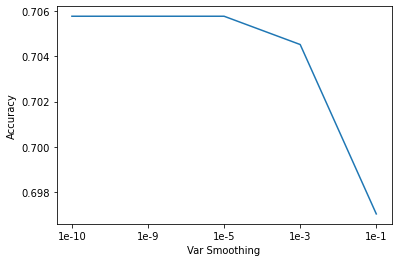

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size = 0.2, random_state = 0)

params_NB= {'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}
gs_NB= GridSearchCV(estimator= GaussianNB(), param_grid=params_NB, cv=10, verbose=1, scoring='accuracy')

TransformedData= PowerTransformer().fit_transform(x_train)

gs_NB.fit(TransformedData, y_train)

df_score= pd.DataFrame.from_dict(gs_NB.cv_results_)

var_smoothing= ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']

plt.plot(var_smoothing, df_score.mean_test_score)

plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")

Figure 3 Accuracy based on number of estimators for Hyper-Parameter Tuning-Label 3 in original dataset.

From Figure 3, it is clear that by increasing smoothing parameter the Accuracy went down slightly. 

# Best Parameter Evaluation:

In [14]:
gs_NB.best_params_

{'var_smoothing': 1e-10}

In [15]:
gs_NB.best_score_

0.7057716049382716

In [16]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=1e-10)

Therfore, the best value for smoothing parametr is 1e-10 for the label 3. 

# Best Parameter Testing on Test Set:

In [17]:
classifier= GaussianNB(var_smoothing= 1e-10)
classifier.fit(x_train, y_train)

predY= classifier.predict(x_test)

print('Accuracy on Test Set:', accuracy_score(y_test,predY))

Accuracy on Test Set: 0.7014925373134329


The test accuracy reached 70.14%.

# Conclusion

It is clear that by increasing smoothing parameter the Accuracy improved slightly for the first two labels. However, it went down for the third label. 

# References:

(1) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

(2) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html